In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Линейный поиск для определения шагового размера
def line_search(f, x, p, alpha0=1, c1=1e-4, rho=0.9):
    alpha = alpha0
    # Условие Армихо для линейного поиска
    while f(x + alpha * p) > f(x) + c1 * alpha * np.dot(gradient(f, x), p):
        alpha *= rho
    return alpha

# Функция для вычисления градиента
def gradient(f, x, epsilon=1e-8):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_h = x.copy()
        x_h[i] += epsilon
        grad[i] = (f(x_h) - f(x)) / epsilon
    return grad

Оптимальное решение: [3.00024996 2.00049975]
Значение целевой функции в оптимуме: 3.12227196231781e-07


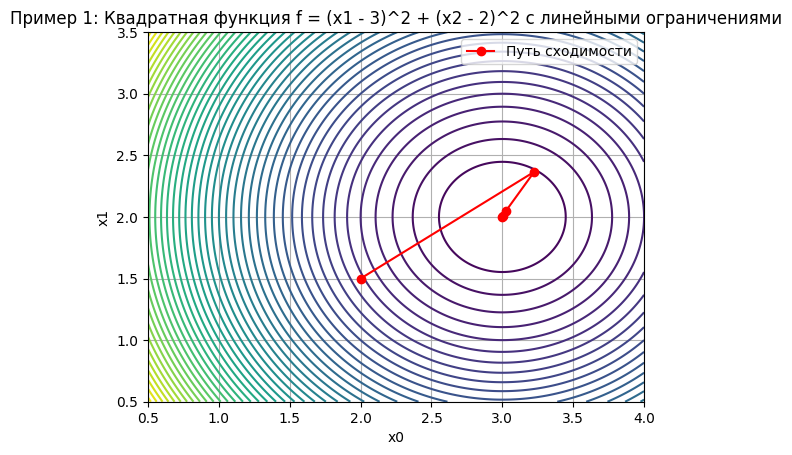

In [33]:
# Целевая функция
def objective(x):
    return (x[0] - 3)**2 + (x[1] - 2)**2

# Барьерная функция для ограничений x[0] > 1 и x[1] > 1
def barrier(x):
    if x[0] <= 1 or x[1] <= 1:
        return float('inf')
    return -np.log(x[0] - 1) - np.log(x[1] - 1)

# Комбинированная функция, включающая целевую и барьерную функции
def combined_func(x, mu):
    return objective(x) + mu * barrier(x)

# Метод Давидона-Флетчера-Пауэлла (DFP) с барьерной функцией
def dfp_method(f, x0, mu, tol=1e-6, max_iter=100):
    n = len(x0)  # Размерность задачи
    H_k = np.eye(n)  # Инициализация матрицы H_k как единичной матрицы
    x_k = x0  # Начальная точка

    for _ in range(max_iter):
        # Вычисление градиента для комбинированной функции
        grad = gradient(lambda x: combined_func(x, mu), x_k)

        if np.linalg.norm(grad) < tol:
            break  # Если норма градиента меньше толерантности, то считаем, что решение достигнуто

        # Направление поиска
        p_k = -np.dot(H_k, grad)
        # Алгоритм линейного поиска для определения шагового размера
        alpha = line_search(lambda x: combined_func(x, mu), x_k, p_k)

        # Обновление новой точки решения
        x_k_next = x_k + alpha * p_k
        # Вычисление нового градиента
        grad_next = gradient(lambda x: combined_func(x, mu), x_k_next)

        # Обновление параметров для метода DFP
        s_k = x_k_next - x_k
        y_k = grad_next - grad
        rho = 1.0 / (np.dot(y_k, s_k))

        # Обновление матрицы H_k
        if rho > 0:
            H_k = (np.eye(n) - rho * np.outer(s_k, y_k)).dot(H_k).dot(np.eye(n) - rho * np.outer(y_k, s_k)) + rho * np.outer(s_k, s_k)

        x_k = x_k_next  # Переход к новой итерации

    return x_k

# Пример 1 ](f = (x1 - 3)^2 + (x2 - 2)^2)
x0 = np.array([2.0, 1.5])  # Начальная точка
mu_start = 1.0  # Начальное значение барьерного параметра
mu_end = 1e-3  # Конечное значение барьерного параметра
mu_reduction = 0.1  # Фактор уменьшения барьерного параметра

# Итерации метода барьерных функций
x_sol = x0
mu = mu_start
history = [x_sol.copy()]  # Сохраняем для графиков сходимости

while mu > mu_end:
    x_sol = dfp_method(lambda x: combined_func(x, mu), x_sol, mu)
    mu *= mu_reduction
    history.append(x_sol.copy())

print("Оптимальное решение:", x_sol)
print("Значение целевой функции в оптимуме:", objective(x_sol))

x_vals = np.linspace(0.5, 4, 400)
y_vals = np.linspace(0.5, 3.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X - 3)**2 + (Y - 2)**2

plt.contour(X, Y, Z, levels=50)
plt.plot([x[0] for x in history], [x[1] for x in history], 'ro-', label='Путь сходимости')
plt.xlim(0.5, 4)
plt.ylim(0.5, 3.5)
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.title('Пример 1: Квадратная функция f = (x1 - 3)^2 + (x2 - 2)^2 с линейными ограничениями')
plt.grid(True)
plt.show()


Оптимальное решение: [-0.00127559 -0.00022045]
Значение целевой функции в оптимуме: 3.584069947396024e-06


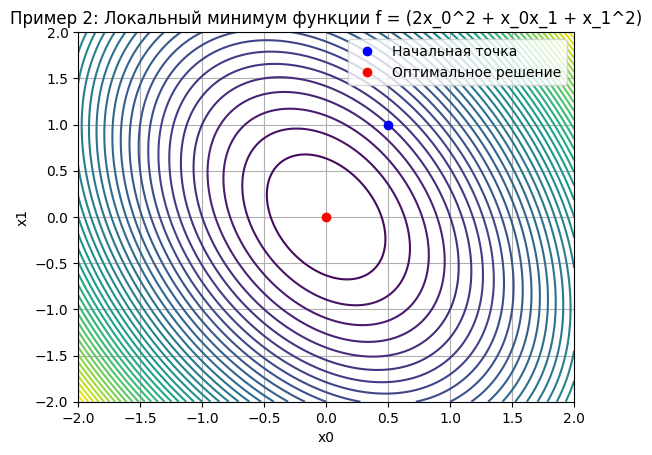

In [32]:
### Пример 2: Найти локальный минимум функции (f(x) = 2x_0^2 + x_0x_1 + x_1^2)

def objective2(x):
    return 2 * x[0]**2 + x[0] * x[1] + x[1]**2

# Барьерная функция для ограничений x[0] > -1 и x[1] > -1
def barrier(x):
    if x[0] <= -1 or x[1] <= -1:
        return float('inf')
    return -np.log(x[0] + 1) - np.log(x[1] + 1)

# Комбинированная функция, включающая целевую и барьерную функции
def combined_func(x, mu):
    return objective2(x) + mu * barrier(x)

# Метод Давидона-Флетчера-Пауэлла (DFP) с барьерной функцией
def dfp_method(f, x0, mu, tol=1e-6, max_iter=100):
    n = len(x0)  # Размерность задачи
    H_k = np.eye(n)  # Инициализация матрицы H_k как единичной матрицы
    x_k = x0  # Начальная точка

    for _ in range(max_iter):
        # Вычисление градиента для комбинированной функции
        grad = gradient(lambda x: combined_func(x, mu), x_k)

        if np.linalg.norm(grad) < tol:
            break  # Если норма градиента меньше толерантности, то считаем, что решение достигнуто

        # Направление поиска
        p_k = -np.dot(H_k, grad)
        # Алгоритм линейного поиска для определения шагового размера
        alpha = line_search(lambda x: combined_func(x, mu), x_k, p_k)

        # Обновление новой точки решения
        x_k_next = x_k + alpha * p_k
        # Вычисление нового градиента
        grad_next = gradient(lambda x: combined_func(x, mu), x_k_next)

        # Обновление параметров для метода DFP
        s_k = x_k_next - x_k
        y_k = grad_next - grad
        rho = 1.0 / (np.dot(y_k, s_k))

        # Обновление матрицы H_k
        if rho > 0:
            H_k = (np.eye(n) - rho * np.outer(s_k, y_k)).dot(H_k).dot(np.eye(n) - rho * np.outer(y_k, s_k)) + rho * np.outer(s_k, s_k)

        x_k = x_k_next  # Переход к новой итерации

    return x_k

x0 = np.array([0.5, 1.0])
eps1 = 0.1
eps2 = 0.15
M = 10
mu_start = 1.0  # Начальное значение барьерного параметра
mu_end = 1e-3  # Конечное значение барьерного параметра
mu_reduction = 0.1  # Фактор уменьшения барьерного параметра

# Итерации метода барьерных функций
mu = mu_start

while mu > mu_end:
    x_sol2 = dfp_method(lambda x: combined_func(x, mu), x0, mu,tol=eps1, max_iter=M)
    mu *= mu_reduction


print("Оптимальное решение:", x_sol2)
print("Значение целевой функции в оптимуме:", objective2(x_sol2))

x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 2 * X**2 + X * Y + Y**2

plt.contour(X, Y, Z, levels=50)
plt.plot(x0[0], x0[1], 'bo', label='Начальная точка')
plt.plot(x_sol2[0], x_sol2[1], 'ro', label='Оптимальное решение')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.title('Пример 2: Локальный минимум функции f = (2x_0^2 + x_0x_1 + x_1^2)')
plt.grid(True)
plt.show()
